In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
df = pd.read_excel('1.xlsx')

Null values under "StatusKaryawan"           : 0
Null values under "KomponenPenggajianBerbeda": 0


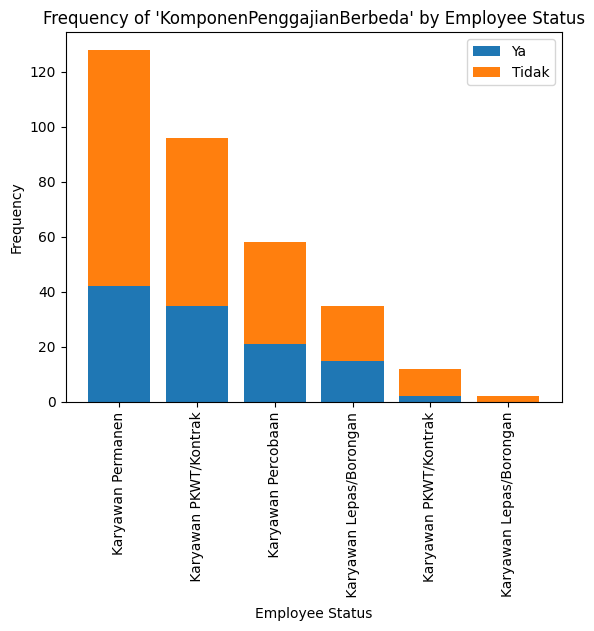

In [5]:
print('Null values under "StatusKaryawan"           :', df['StatusKaryawan'].isna().sum())
print('Null values under "KomponenPenggajianBerbeda":', df['KomponenPenggajianBerbeda'].isna().sum())

df = df.dropna(subset=['StatusKaryawan','KomponenPenggajianBerbeda'])

df['StatusKaryawan'] = df['StatusKaryawan'].str.split(',')

# Create an empty dictionary to store the frequency of 'KomponenPenggajianBerbeda' for each employee status
result = {}

# Iterate over each row in the dataframe
for _, row in df.iterrows():
    statuses = row['StatusKaryawan']
    components = row['KomponenPenggajianBerbeda']
    
    # Iterate over each employee status in the row
    for status in statuses:
        if status not in result:
            result[status] = {'Ya': 0, 'Tidak': 0}
        
        # Update the frequency of 'KomponenPenggajianBerbeda' for the current employee status
        result[status][components] += 1

# Create lists to store the data for visualization
employee_statuses = []
ya_counts = []
tidak_counts = []

# Iterate over the result dictionary to extract the data for visualization
for status, counts in result.items():
    employee_statuses.append(status)
    ya_counts.append(counts['Ya'])
    tidak_counts.append(counts['Tidak'])

# Plot the data using a stacked bar chart
plt.bar(employee_statuses, ya_counts, label='Ya')
plt.bar(employee_statuses, tidak_counts, bottom=ya_counts, label='Tidak')
plt.xlabel('Employee Status')
plt.ylabel('Frequency')
plt.title("Frequency of 'KomponenPenggajianBerbeda' by Employee Status")
plt.legend()
plt.xticks(rotation=90)
plt.show()